In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import Workbook
from io import BytesIO

In [8]:
path=input(r'Please key in the folder name: ')

Please key in the folder name: C:\Users\Computer\OneDrive\Máy tính\Sale 2019


In [9]:
import glob
glob.glob(path+'\*.csv')

['C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_1.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_10.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_11.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_12.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_2.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_3.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_4.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_5.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_6.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_7.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_8.csv',
 'C:\\Users\\Computer\\OneDrive\\Máy tính\\Sale 2019\\sales2019_9.csv']

In [10]:
all_dfs=[]
for x_filepath in glob.glob(path+'\*.csv'):
    x_df=pd.read_csv(x_filepath)
    all_dfs.append(x_df)
    new_df=pd.concat(all_dfs)
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [11]:
new_df['Month']=new_df['Order Date'].str[0:2]
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [12]:
print(set(new_df['Month']))

{'06', 'Or', '12', '09', '04', '05', nan, '07', '02', '03', '01', '11', '08', '10'}


In [13]:
new_df=new_df.dropna(how='all')
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [14]:
new_df=new_df[new_df['Month']!='Or']
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [15]:
print(new_df.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object


In [16]:
new_df['Quantity Ordered']=new_df['Quantity Ordered'].astype(int)
new_df['Price Each']=new_df['Price Each'].astype(float)

In [17]:
new_df.insert(4,'Sales',new_df['Quantity Ordered']*new_df['Price Each'])

In [18]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [19]:
df1=new_df.groupby('Month').sum()['Sales'].sort_values(ascending=True).reset_index()
df1

,Month,Sales
0,01,1822256.73
1,09,2097560.13
2,02,2202022.42
3,08,2244467.88
4,06,2577802.26
5,07,2647775.76
6,03,2807100.38
7,05,3152606.75
8,11,3199603.20
9,04,3390670.24


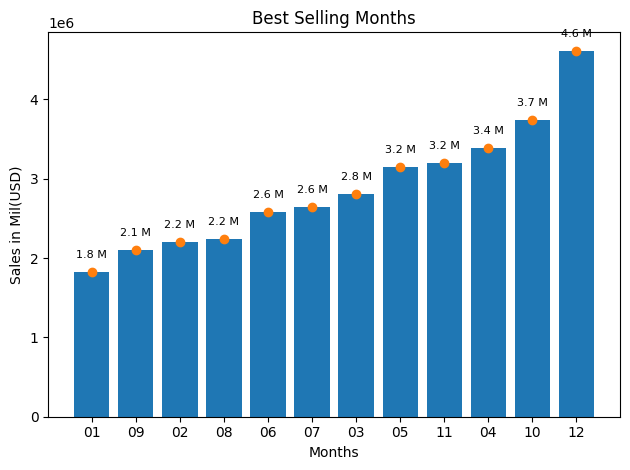

In [20]:
fig1=plt.figure()
plt.bar(df1['Month'],df1['Sales'])
plt.title('Best Selling Months')
plt.xlabel('Months')
plt.ylabel('Sales in Mil(USD)')
plt.scatter(df1['Month'], df1['Sales'])
def format_millions(x, pos):
    return f'{x/1e6:.1f} M'
for i, sale in enumerate(df1['Sales']):
    plt.annotate(format_millions(sale, None), 
                 (df1['Month'][i], sale),textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
    
plt.tight_layout()    

In [21]:
new_df1=new_df['Purchase Address'].str.split(',',n=0,expand=True)
new_df['City']=new_df1[1]
new_df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,8.97,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,Los Angeles
11682,259354,iPhone,1,700.00,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,San Francisco
11683,259355,iPhone,1,700.00,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,San Francisco


In [22]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [23]:
df2=new_df.groupby('City').sum()['Sales'].sort_values(ascending=True).reset_index()
df2

,City,Sales
0,Austin,1819581.75
1,Portland,2320490.61
2,Seattle,2747755.48
3,Dallas,2767975.40
4,Atlanta,2795498.58
5,Boston,3661642.01
6,New York City,4664317.43
7,Los Angeles,5452570.80
8,San Francisco,8262203.91


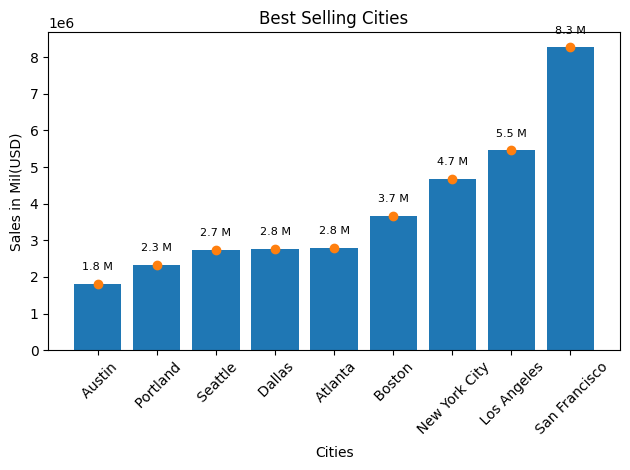

In [24]:
fig2=plt.figure()
plt.bar(df2['City'],df2['Sales'])
plt.xticks(df2['City'],rotation=45)
plt.title('Best Selling Cities')
plt.xlabel('Cities')
plt.ylabel('Sales in Mil(USD)')
plt.scatter(df2['City'], df2['Sales'])
for i, sale in enumerate(df2['Sales']):
    plt.annotate(format_millions(sale, None), 
                 (df2['City'][i], sale),textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)
plt.tight_layout()    

In [25]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700.00,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,Portland
2,141236,Wired Headphones,2,11.99,23.98,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,Austin


In [26]:
new_df['Order Date'] = pd.to_datetime(new_df['Order Date'], format='%m/%d/%y %H:%M')

In [27]:
new_df[new_df['Order Date'].dt.strftime('%m/%d/%y %H:%M') != new_df['Order Date']]

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City


In [28]:
new_df['OrderHour']=new_df['Order Date'].dt.hour

In [29]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,OrderHour
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [30]:
new_df['OrderHour']=new_df['OrderHour'].astype(str)

In [31]:
print(new_df.dtypes)

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Sales                      float64
Order Date          datetime64[ns]
Purchase Address            object
Month                       object
City                        object
OrderHour                   object
dtype: object


In [32]:
df3=new_df.groupby('OrderHour').count()['Sales'].sort_values(ascending=True).reset_index()
df3

,OrderHour,Sales
0,3,831
1,4,854
2,2,1243
3,5,1321
4,1,2350
5,6,2482
6,0,3910
7,7,4011
8,8,6256
9,23,6275


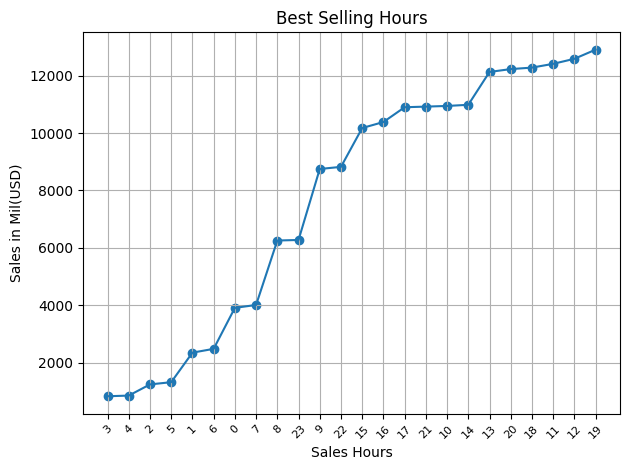

In [33]:
fig3=plt.figure()
plt.plot(df3['OrderHour'],df3['Sales'])
plt.xticks(df3['OrderHour'],rotation=45,size=8)
plt.grid()
plt.title('Best Selling Hours')
plt.xlabel('Sales Hours')
plt.ylabel('Sales in Mil(USD)')
plt.scatter(df3['OrderHour'], df3['Sales'])

plt.tight_layout()

In [34]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,OrderHour
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [35]:
dup_df=new_df[new_df['Order ID'].duplicated(keep=False)]

In [36]:
dup_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,OrderHour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11


In [37]:
dup_df1=dup_df
dup_df1

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,OrderHour
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,New York City,11
...,...,...,...,...,...,...,...,...,...,...
11628,259303,AA Batteries (4-pack),1,3.84,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",09,Atlanta,20
11639,259314,Wired Headphones,1,11.99,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
11640,259314,AAA Batteries (4-pack),2,2.99,5.98,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",09,Atlanta,0
11677,259350,Google Phone,1,600.00,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",09,San Francisco,13


In [38]:
dup_df2=dup_df1.groupby('Order ID').agg({'Product':', '.join}).reset_index()

In [39]:
dup_df2

,Order ID,Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
...,...,...
7131,319536,"Macbook Pro Laptop, Wired Headphones"
7132,319556,"Google Phone, Wired Headphones"
7133,319584,"iPhone, Wired Headphones"
7134,319596,"iPhone, Lightning Charging Cable"


In [40]:
dup_df3=dup_df2['Product'].value_counts().reset_index().head(10)
dup_df3

,Product,count
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
5,"iPhone, Apple Airpods Headphones",286
6,"Google Phone, Bose SoundSport Headphones",161
7,"Vareebadd Phone, Wired Headphones",104
8,"Google Phone, USB-C Charging Cable, Wired Head...",77
9,"Vareebadd Phone, Bose SoundSport Headphones",60


In [41]:
dup_df3['Count_Product']=dup_df3['count']
dup_df3.drop(['count'],axis=1)

,Product,Count_Product
0,"iPhone, Lightning Charging Cable",882
1,"Google Phone, USB-C Charging Cable",856
2,"iPhone, Wired Headphones",361
3,"Vareebadd Phone, USB-C Charging Cable",312
4,"Google Phone, Wired Headphones",303
5,"iPhone, Apple Airpods Headphones",286
6,"Google Phone, Bose SoundSport Headphones",161
7,"Vareebadd Phone, Wired Headphones",104
8,"Google Phone, USB-C Charging Cable, Wired Head...",77
9,"Vareebadd Phone, Bose SoundSport Headphones",60


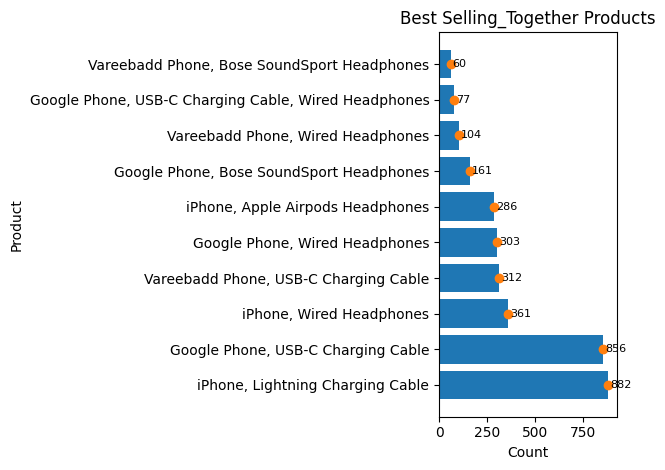

In [42]:
fig4=plt.figure()
plt.barh(dup_df3['Product'],dup_df3['Count_Product'])
plt.title('Best Selling_Together Products')
plt.xlabel('Count')
plt.ylabel('Product')
plt.scatter(dup_df3['Count_Product'], dup_df3['Product'])
for i, count in enumerate(dup_df3['Count_Product']):
    plt.text(count + 10, i, str(count), va='center', fontsize=8)
plt.tight_layout()

In [43]:
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City,OrderHour
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,Boston,21
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,Portland,14
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,San Francisco,13
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,Los Angeles,20
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,Austin,11


In [44]:
new_df['Order Date'] = new_df['Order Date'].astype(str)

In [45]:
df4=new_df.groupby(['Product','Price Each']).sum()['Quantity Ordered'].sort_values(ascending=False).head(10).reset_index()
df4

,Product,Price Each,Quantity Ordered
0,AAA Batteries (4-pack),2.99,31017
1,AA Batteries (4-pack),3.84,27635
2,USB-C Charging Cable,11.95,23975
3,Lightning Charging Cable,14.95,23217
4,Wired Headphones,11.99,20557
5,Apple Airpods Headphones,150.00,15661
6,Bose SoundSport Headphones,99.99,13457
7,27in FHD Monitor,149.99,7550
8,iPhone,700.00,6849
9,27in 4K Gaming Monitor,389.99,6244


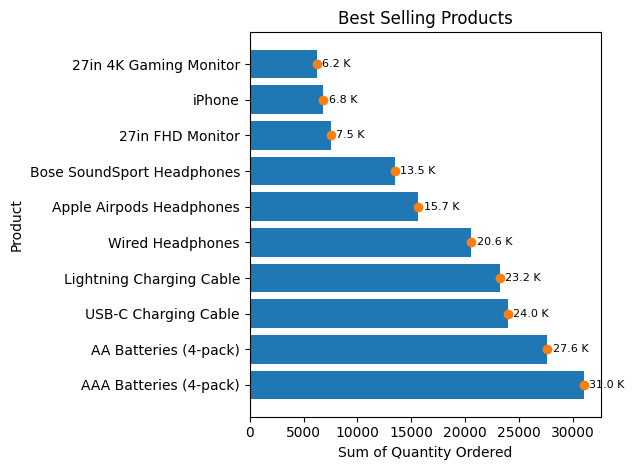

In [46]:
fig5=plt.figure()
plt.barh(df4['Product'],df4['Quantity Ordered'])
plt.title('Best Selling Products')
plt.xlabel('Sum of Quantity Ordered')
plt.ylabel('Product')
def format_thousands(x):
    return f'{x/1e3:.1f} K'
plt.scatter(df4['Quantity Ordered'],df4['Product'])
for i, quantity in enumerate(df4['Quantity Ordered']):
    plt.text(quantity + 500, i, format_thousands(quantity), va='center', fontsize=8)

plt.tight_layout()

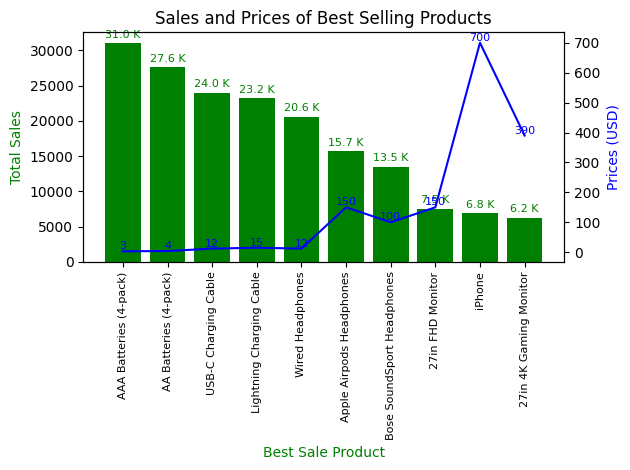

In [47]:
x = df4['Product']
y1 = df4['Quantity Ordered']
y2 = df4['Price Each']

fig6, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(x,rotation=90,size=8)
plt.title('Sales and Prices of Best Selling Products')
ax1.set_xlabel('Best Sale Product',color='g')
ax1.set_ylabel('Total Sales', color='g')
ax2.set_ylabel('Prices (USD)', color='b')

for i, (sales, price) in enumerate(zip(y1, y2)):
    ax1.text(i, sales + 500, format_thousands(sales), ha='center', va='bottom', fontsize=8, color='g')

for i, (sales, price) in enumerate(zip(y1, y2)):
    ax2.text(i, price, f'{price:.0f}', ha='center', va='bottom', fontsize=8, color='b')
    
plt.tight_layout()

In [48]:
with pd.ExcelWriter(r'C:\Leo\Reports\Sales\Report1.xlsx', engine='xlsxwriter') as excel_writer:
    df1.to_excel(excel_writer, sheet_name='Sheet1', index=False)
    df2.to_excel(excel_writer, sheet_name='Sheet2', index=False)
    df3.to_excel(excel_writer, sheet_name='Sheet3', index=False)
    df4.to_excel(excel_writer, sheet_name='Sheet4', index=False)
    
    chart_image1 = BytesIO()
    fig1.savefig(chart_image1, format='png', bbox_inches='tight')
    plt.close(fig1)

    chart_image2 = BytesIO()
    fig2.savefig(chart_image2, format='png', bbox_inches='tight')
    plt.close(fig2)
    
    chart_image3 = BytesIO()
    fig3.savefig(chart_image3, format='png', bbox_inches='tight')
    plt.close(fig3)

    chart_image4 = BytesIO()
    fig4.savefig(chart_image4, format='png', bbox_inches='tight')
    plt.close(fig4)
    
    chart_image5 = BytesIO()
    fig5.savefig(chart_image5, format='png', bbox_inches='tight')
    plt.close(fig5)

    chart_image6 = BytesIO()
    fig6.savefig(chart_image6, format='png', bbox_inches='tight')
    plt.close(fig6)

    chart_sheet = excel_writer.book.add_worksheet('Charts')

    chart_sheet.insert_image('A1', 'chart_image1.png', {'image_data': chart_image1})
    chart_sheet.insert_image('A23', 'chart_image2.png', {'image_data': chart_image2})
    chart_sheet.insert_image('J1', 'chart_image3.png', {'image_data': chart_image3})
    chart_sheet.insert_image('J23', 'chart_image4.png', {'image_data': chart_image4})
    chart_sheet.insert_image('S1', 'chart_image5.png', {'image_data': chart_image5})
    chart_sheet.insert_image('S23', 'chart_image6.png', {'image_data': chart_image6})